In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import glob
import json
import pickle as pkl
import ast
import os

from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 128 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [26]:
weblist = pd.read_csv("../lite_data/domaintitles_annotated_no_international.csv", header=0)
weblist.head()

,Unnamed: 0,Unnamed: 0.1,domain,title_text,is_news,titleDEsc,international,if_annotated_international
0,0,0,indiatoday.in,"Latest News, Breaking News Today - Bollywood, ...",1.0,"indiatoday.in\nLatest News, Breaking News Toda...",domestic,True
1,1,3,prajavani.net,"Prajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್ದಿ, ಸಮಾಚಾರ, ವಾರ...",1.0,prajavani.net\nPrajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್...,domestic,True
2,2,4,thehindu.com,"\nThe Hindu: Breaking News, India News, Sports...",1.0,"thehindu.com\n\nThe Hindu: Breaking News, Indi...",domestic,True
3,3,6,abplive.com,"Hindi News, Breaking News in Hindi, हिंदी न्यू...",1.0,"abplive.com\nHindi News, Breaking News in Hind...",domestic,True
4,4,8,news18.com,"News, Breaking News, Latest News, News Headlin...",1.0,"news18.com\nNews, Breaking News, Latest News, ...",domestic,True


In [28]:
weblist.loc[weblist['international']=='domestic']

,Unnamed: 0,Unnamed: 0.1,domain,title_text,is_news,titleDEsc,international,if_annotated_international
0,0,0,indiatoday.in,"Latest News, Breaking News Today - Bollywood, ...",1.0,"indiatoday.in\nLatest News, Breaking News Toda...",domestic,True
1,1,3,prajavani.net,"Prajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್ದಿ, ಸಮಾಚಾರ, ವಾರ...",1.0,prajavani.net\nPrajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್...,domestic,True
2,2,4,thehindu.com,"\nThe Hindu: Breaking News, India News, Sports...",1.0,"thehindu.com\n\nThe Hindu: Breaking News, Indi...",domestic,True
3,3,6,abplive.com,"Hindi News, Breaking News in Hindi, हिंदी न्यू...",1.0,"abplive.com\nHindi News, Breaking News in Hind...",domestic,True
4,4,8,news18.com,"News, Breaking News, Latest News, News Headlin...",1.0,"news18.com\nNews, Breaking News, Latest News, ...",domestic,True
...,...,...,...,...,...,...,...,...
395,395,930,khabarchalisa.com,Khabarchalisa News – Leading News Portal of Ch...,1.0,khabarchalisa.com\nKhabarchalisa News – Leadin...,domestic,True
396,396,931,jhansitimes.com,"Jhansi News In Hindi, झांसी समाचार, Jhansi Bre...",1.0,"jhansitimes.com\nJhansi News In Hindi, झांसी स...",domestic,True
397,397,937,dinakaran.com,Tamil News | Online Tamil News | Tamil News Li...,1.0,dinakaran.com\nTamil News | Online Tamil News ...,domestic,True
398,398,939,andhrajyothy.com,Andhrajyothi for Latest Telugu News,1.0,andhrajyothy.com\nAndhrajyothi for Latest Telu...,domestic,True


In [2]:
LEVEL1_FOLDERS = ['facebook_linkposts', 'facebook_linkposts_redo1', 'facebook_linkposts_redo2']
allfiles = []

for l in LEVEL1_FOLDERS:
    l1path = '/data/shruti/ONR/big_data/' + l + '/*'
    LEVEL2_FOLDERS = glob.glob(l1path)
    for l2 in LEVEL2_FOLDERS:
        l2path = l2 + "/*.json"
        fnames = glob.glob(l2path)
        for f in fnames:
            if os.stat(f).st_size == 0:
                fakevar=1
            else:
                allfiles.append(f)


In [25]:
LEVEL2_FOLDERS

['/data/shruti/ONR/big_data/facebook_linkposts_redo2/telegraphindia.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/kanaknews.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/samajalive.in',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/enewsinsight.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/indiatv.in',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/firstindianews.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/maharashtratimes.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/organiser.org',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/tv9bharatvarsh.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/punjabkesari.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/nationnews.in',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/news24online.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/nationalheraldindia.com',
 '/data/shruti/ONR/big_data/facebook_linkposts_redo2/lagatar.in',

In [3]:
allfiles = list(set(allfiles))
len(allfiles)

3101

In [4]:
def get_contents(fileName):
    dictlist = []
    with open(fileName, "r") as jfile:
        for line in jfile:
            tempdict = {}
            try:
                job = json.loads(line)
            except:
                job = None
            if job!=None:    
                if "account" in job:
                    try:
                        tempdict['handle'] = job['account']['name']
                    except:
                        fakevar=1

                    try:
                        tempdict['account_type'] = job['account']['accountType']
                    except:
                        fakevar=1

                    try:
                        tempdict['id'] = job['account']['id']
                    except:
                        fakevar=1
                        
                    try:
                        tempdict['subscriberCount'] = job['account']['subscriberCount']
                    except:
                        fakevar=1
                        
                    
                    try:
                        tempdict['pageCategory'] = job['account']['pageCategory']
                    except:
                        fakevar=1

                    try:
                        tempdict['pageURL'] = job['account']['url']
                    except:
                        fakevar=1


                    dictlist.append(tempdict)

    if len(dictlist) > 0:
        return dictlist


In [5]:
filcontent = pd.DataFrame()
filcontent['fileNames'] = allfiles
filcontent['content'] = filcontent['fileNames'].parallel_apply(lambda x: get_contents(x))

In [6]:
len(filcontent.dropna(subset=['content']))

3101

In [7]:
def get_contentLength(content):
    try:
        return len(content)
    except:
        return 0
    
filcontent['contentLength'] = filcontent['content'].parallel_apply(lambda x: get_contentLength(x))

In [8]:
invalidfiles = filcontent.loc[filcontent['contentLength']==0]['fileNames'].tolist()

In [9]:
invalidfiles

[]

In [10]:
jsonList = []

for idx, row in filcontent.iterrows():
    for c in row['content']:
        jsonList.append(c)

In [11]:
fdata = pd.DataFrame(jsonList)

In [12]:
fdata.head()

,handle,account_type,id,subscriberCount,pageCategory,pageURL
0,Cyber Trollers - CT,facebook_page,1931678,290010,MEDIA_NEWS_COMPANY,https://www.facebook.com/1588185424804402
1,Jayasurya,facebook_page,329233,2602036,ARTIST,https://www.facebook.com/286785594808461
2,Troll Malayalam,facebook_page,839934,1177027,MEDIA_NEWS_COMPANY,https://www.facebook.com/441269415895560
3,Mathrubhumi News,facebook_page,850498,1927138,TV_CHANNEL,https://www.facebook.com/395449133884561
4,Mathrubhumi,facebook_page,330008,3531910,TOPIC_NEWSPAPER,https://www.facebook.com/332934167717


In [13]:
print(len(fdata), len(fdata.dropna()))

11694115 11681318


In [14]:
print(Counter(fdata['pageCategory'].tolist()))

Counter({'MEDIA_NEWS_COMPANY': 3606868, 'NEWS_SITE': 2283115, 'none': 1874708, 'TOPIC_NEWSPAPER': 837960, 'BROADCASTING_MEDIA_PRODUCTION': 681494, 'TV_CHANNEL': 574179, 'ACTIVITY_GENERAL': 292855, 'COMMUNITY': 147274, 'PERSON': 114780, 'MAGAZINE': 106035, 'MEDIA': 75555, 'TOPIC_PUBLISHER': 73248, 'ENTERTAINMENT_SITE': 59122, 'learning': 56284, 'POLITICIAN': 54342, 'NON_PROFIT': 47439, 'MEDICAL_HEALTH': 46708, 'ECOMMERCE_WEBSITE': 43967, 'EDU_SITE': 43906, 'BIZ_SITE': 42951, 'LOCAL': 40148, 'POLITICAL_ORGANIZATION': 35289, 'BLOGGER': 31282, 'WEBSITE': 28218, 'jobs': 25089, 'VIDEO_CREATOR': 17430, 'HEALTH_BEAUTY': 17091, 'DISCOUNT_STORE': 16567, 'PERSONAL_BLOG': 16229, 'POLITICAL_PARTY': 15137, 'JOURNALIST': 14801, 'TV_NETWORK': 13272, 'EDUCATION_COMPANY': 13134, 'COMMUNITY_ORGANIZATION': 12927, nan: 12797, 'SPORTS': 12682, 'GOVERNMENT_ORGANIZATION': 11539, 'work_team': 10966, 'ART': 10376, 'RELIGIOUS_ORGANIZATION': 9182, 'TOPIC_ARTS_ENTERTAINMENT': 8652, 'SCIENCE_ENGINEERING': 7622, 'MO

In [15]:
fdata.loc[fdata['pageCategory']=='POLITICAL_PARTY']

,handle,account_type,id,subscriberCount,pageCategory,pageURL
342,Unofficial കോൺഗ്രസ്,facebook_page,15234534,16635,POLITICAL_PARTY,https://www.facebook.com/1464134577160717
889,Unofficial കോൺഗ്രസ്,facebook_page,15234534,16635,POLITICAL_PARTY,https://www.facebook.com/1464134577160717
1222,ബിജെപി എലിക്കുളം,facebook_page,15234671,1467,POLITICAL_PARTY,https://www.facebook.com/655679157832833
1480,LDF Malappuram,facebook_page,9147789,51994,POLITICAL_PARTY,https://www.facebook.com/429786587166489
2877,നുണറായി ഫലിതങ്ങൾ,facebook_page,9145707,114045,POLITICAL_PARTY,https://www.facebook.com/278238385858572
...,...,...,...,...,...,...
11678644,CPIM Maharashtra - मार्क्सवादी कम्युनिस्ट पक्ष...,facebook_page,12874308,26782,POLITICAL_PARTY,https://www.facebook.com/531758963603344
11682496,Voice Of Telangana Congress,facebook_page,12421315,11654,POLITICAL_PARTY,https://www.facebook.com/419490305205819
11689182,Aam Aadmi Party Navsari,facebook_page,2645452,6285,POLITICAL_PARTY,https://www.facebook.com/526548100689906
11689248,આમ આદમી પાર્ટી - હળવદ,facebook_page,15435913,4103,POLITICAL_PARTY,https://www.facebook.com/104408551383018


In [16]:
fdata  = fdata.dropna()

In [17]:
fdata.sample(5)

,handle,account_type,id,subscriberCount,pageCategory,pageURL
650715,OTV NUAPADA,facebook_group,13356716,4114,none,https://www.facebook.com/groups/1492720950930529
8631163,NorthEast Jobs,facebook_page,3922452,4607,ACTIVITY_GENERAL,https://www.facebook.com/1880177952016782
4780206,Sakal,facebook_page,373361,2497176,TOPIC_NEWSPAPER,https://www.facebook.com/55436896972
3533746,Top Lawyers India,facebook_group,9054210,54883,none,https://www.facebook.com/groups/117428415619042
10748585,Zee News Entertainment,facebook_page,4359842,13286,NEWS_SITE,https://www.facebook.com/279993582572973


In [18]:
fdata = fdata.drop_duplicates()
len(fdata)

280697

In [19]:
fdata.sample(5)

,handle,account_type,id,subscriberCount,pageCategory,pageURL
8277818,ಮೋದಿ ಯುಗ-Modi Era,facebook_page,7065747,30827,POLITICIAN,https://www.facebook.com/266216217495248
781221,Ratan tata -The Greatest Man | Pride & Icon of...,facebook_group,13217578,160457,none,https://www.facebook.com/groups/559558441658973
993104,SS Sports,facebook_group,15435180,16894,none,https://www.facebook.com/groups/674765450092331
4556801,Fatima khan,facebook_page,7986902,331348,PERSON,https://www.facebook.com/1667279483516998
1254210,Top News Headlines,facebook_page,12819487,147,WEBSITE,https://www.facebook.com/169931300021658


In [20]:
len(fdata.loc[fdata['account_type']=='facebook_group'])

155139

In [21]:
data = fdata.loc[fdata['account_type']=='facebook_group']

In [29]:
data.sample(5)

,handle,account_type,id,subscriberCount,pageCategory,pageURL
1384320,छोरा ठाकुर के,facebook_group,14862141,32356,none,https://www.facebook.com/groups/2621330594816156
3077286,பேஸ்புக் தமிழ் குழு,facebook_group,7707623,287248,none,https://www.facebook.com/groups/197396890864843
2743302,திருப்பூர் வேலை வாய்ப்பு,facebook_group,14707784,30415,none,https://www.facebook.com/groups/822646711455604
284019,ALL INDIA DISTRIBUTORS FMCG,facebook_group,15006854,106028,none,https://www.facebook.com/groups/649293935536187
4393331,ಶ್ರೀ ಹರೀಶ್ ಪೂಂಜ ಅಭಿಮಾನಿ ಬಳಗ ಕರ್ನಾಟಕ,facebook_group,14536985,11812,none,https://www.facebook.com/groups/117898589019931


In [23]:
print(Counter(data['pageCategory'].tolist()))

Counter({'none': 148060, 'learning': 4330, 'jobs': 1646, 'game': 519, 'parenting': 313, 'theme': 133, 'work_team': 128, 'streamer': 6, 'for_work': 4})


<AxesSubplot:ylabel='Frequency'>

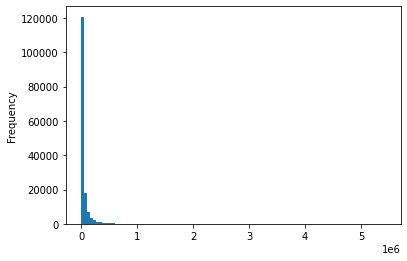

In [30]:
data['subscriberCount'].plot(kind='hist', bins=100)

In [33]:
data[data['subscriberCount']>5000].sample(5)

,handle,account_type,id,subscriberCount,pageCategory,pageURL
4191468,आल इंडिया भारतीय प्रजापति युवा शक्ति (केवल प्र...,facebook_group,9053276,118879,none,https://www.facebook.com/groups/315587672286458
4178888,Travel & Tourism,facebook_group,15420434,21354,none,https://www.facebook.com/groups/2118472764926881
7048058,ನೆನಪುಗಳ ಮಾತು ಮಧುರ,facebook_group,9060182,54176,none,https://www.facebook.com/groups/127603557867544
314796,"Команда ""ЗЕ"" Змінимо Україну Разом!",facebook_group,10144575,72999,none,https://www.facebook.com/groups/347294392782638
4907318,ประชาธิปไตยและเสรี,facebook_group,15417811,41235,none,https://www.facebook.com/groups/240175367488491


In [38]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect('आल इंडिया भारतीय प्रजापति युवा शक्ति')

'mr'

In [40]:
def detelang(text):
    try:
        return detect(text)
    except:
        fakevar=1

In [41]:
data['language'] = data['handle'].apply(lambda x: detelang(x))

<ipython-input-41-ae2418091b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['language'] = data['handle'].apply(lambda x: detelang(x))


In [56]:
data = data.drop_duplicates(subset=['pageURL'])
len(data)

90249

In [59]:
data.to_csv("../lite_data/allfacebookgroups.csv")

In [57]:
print(Counter(data['language'].tolist()))

Counter({'en': 35249, 'de': 6754, 'id': 4183, 'bn': 3226, 'hi': 2990, 'es': 2170, None: 2164, 'mr': 1996, 'pt': 1905, 'tl': 1868, 'so': 1664, 'it': 1638, 'fr': 1586, 'vi': 1524, 'ml': 1335, 'sw': 1311, 'ta': 1191, 'nl': 1134, 'ro': 1040, 'ca': 1020, 'ne': 935, 'th': 852, 'et': 786, 'kn': 684, 'ar': 665, 'sv': 634, 'af': 629, 'ko': 627, 'no': 624, 'hu': 535, 'ru': 484, 'da': 483, 'fi': 480, 'cy': 478, 'te': 468, 'pl': 435, 'gu': 421, 'tr': 412, 'hr': 398, 'he': 303, 'bg': 300, 'sq': 294, 'el': 274, 'sl': 269, 'uk': 265, 'pa': 235, 'ja': 231, 'ur': 208, 'lt': 200, 'fa': 151, 'zh-cn': 116, 'cs': 110, 'sk': 100, 'zh-tw': 80, 'lv': 77, 'mk': 58})


In [58]:
import pytangle

In [51]:
hindigroups = data.loc[(data['language']=='hi')&(data['subscriberCount']>10000)][['pageURL']]
hindigroups.head(5)

,pageURL
12482,https://www.facebook.com/groups/3440291266008364
14599,https://www.facebook.com/groups/214878661924860
17415,https://www.facebook.com/groups/1072988023170861
18455,https://www.facebook.com/groups/2202324520037498
19486,https://www.facebook.com/groups/110791545741766


In [52]:
hindigroups['List'] = 'hindi_polgroups'

In [53]:
hindigroups = hindigroups.rename(columns={"pageURL":'Page or Account URL'})

In [54]:
hindigroups.head()

,Page or Account URL,List
12482,https://www.facebook.com/groups/3440291266008364,hindi_polgroups
14599,https://www.facebook.com/groups/214878661924860,hindi_polgroups
17415,https://www.facebook.com/groups/1072988023170861,hindi_polgroups
18455,https://www.facebook.com/groups/2202324520037498,hindi_polgroups
19486,https://www.facebook.com/groups/110791545741766,hindi_polgroups


In [55]:
hindigroups.to_csv("../lite_data/facebook_hindigroups.csv")

In [45]:
print(Counter(data['language'].tolist()))

Counter({'en': 55909, 'de': 11146, 'id': 8639, 'hi': 7861, 'bn': 5914, 'mr': 5059, 'ml': 3291, 'tl': 3291, 'so': 3145, None: 3114, 'ta': 2849, 'es': 2666, 'sw': 2625, 'pt': 2543, 'it': 2432, 'fr': 2338, 'vi': 2329, 'ne': 2200, 'nl': 1826, 'kn': 1808, 'ro': 1617, 'ca': 1605, 'et': 1420, 'te': 1412, 'th': 1255, 'sv': 1176, 'gu': 1045, 'af': 959, 'no': 938, 'cy': 882, 'fi': 881, 'ko': 863, 'hu': 802, 'tr': 760, 'ar': 760, 'da': 724, 'hr': 686, 'pl': 685, 'sq': 673, 'pa': 669, 'ru': 622, 'sl': 434, 'bg': 383, 'he': 382, 'uk': 327, 'el': 324, 'ja': 320, 'lt': 315, 'ur': 309, 'fa': 210, 'zh-cn': 152, 'cs': 145, 'sk': 133, 'lv': 124, 'zh-tw': 93, 'mk': 69})
